In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler
ss = StandardScaler()
label = LabelEncoder()

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc



from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()



import warnings
warnings.filterwarnings('ignore')

In [4]:
Labeled_train = pd.read_csv('labelled_data.csv')

In [5]:
X1 = Labeled_train.drop(['salary'], axis = 1)
Y1 = Labeled_train['salary']

In [6]:
X1 = ss.fit_transform(X1)

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 50)

# Log

In [8]:
log = LR.fit(X_train1, y_train1)

In [9]:
y_pred1 = log.predict(X_test1)

In [10]:
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[ 724  821]
 [ 278 4690]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      1545
           1       0.85      0.94      0.90      4968

    accuracy                           0.83      6513
   macro avg       0.79      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513



In [23]:
log_prob = LR.predict_proba(X_test1)

In [24]:
log_prob = log_prob[:,1]

In [26]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test1, log_prob)
lr_f1, lr_auc = f1_score(y_test1, y_pred1), auc(lr_recall, lr_precision)

In [27]:
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.895 auc=0.948


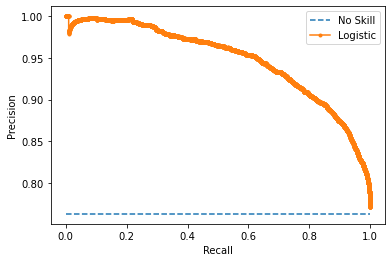

In [29]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_train1, y_train1)
y_pred2 = knn.predict(X_test1)

In [16]:
print(confusion_matrix(y_test1, y_pred2))
print(classification_report(y_test1, y_pred2))

[[ 942  603]
 [ 444 4524]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1545
           1       0.88      0.91      0.90      4968

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.84      6513



In [34]:
knn_prob = knn.predict_proba(X_test1)

In [35]:
knn_prob = knn_prob[:,1]

In [37]:
knn_precision, knn_recall, _ = precision_recall_curve(y_test1, knn_prob)
knn_f1, knn_auc = f1_score(y_test1, y_pred2), auc(knn_recall, knn_precision)

In [38]:
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

KNN: f1=0.896 auc=0.951


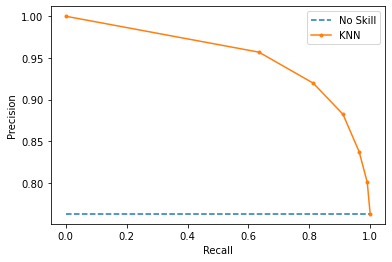

In [39]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Navies Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train1, y_train1)
y_pred3 = gnb.predict(X_test1)

In [18]:
print(confusion_matrix(y_test1, y_pred3))
print(classification_report(y_test1, y_pred3))

[[ 544 1001]
 [ 238 4730]]
              precision    recall  f1-score   support

           0       0.70      0.35      0.47      1545
           1       0.83      0.95      0.88      4968

    accuracy                           0.81      6513
   macro avg       0.76      0.65      0.68      6513
weighted avg       0.79      0.81      0.79      6513



In [40]:
gnb_prob = gnb.predict_proba(X_test1)

In [41]:
gnb_prob = gnb_prob[:,1]

In [42]:
gnb_precision, gnb_recall, _ = precision_recall_curve(y_test1, gnb_prob)
gnb_f1, gnb_auc = f1_score(y_test1, y_pred3), auc(gnb_recall, gnb_precision)

In [43]:
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

KNN: f1=0.896 auc=0.951


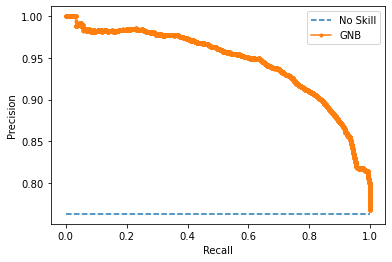

In [44]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(gnb_recall, gnb_precision, marker='.', label='GNB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train1, y_train1)
y_pred4 = dtc.predict(X_test1)

In [20]:
print(confusion_matrix(y_test1, y_pred4))
print(classification_report(y_test1, y_pred4))

[[ 937  608]
 [ 640 4328]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1545
           1       0.88      0.87      0.87      4968

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [45]:
dtc_prob = dtc.predict_proba(X_test1)

In [46]:
dtc_prob = dtc_prob[:,1]

In [47]:
dtc_precision, dtc_recall, _ = precision_recall_curve(y_test1, dtc_prob)

In [49]:
dtc_f1, dtc_auc = f1_score(y_test1, y_pred4), auc(dtc_recall, dtc_precision)

In [50]:
print('dtc: f1=%.3f auc=%.3f' % (dtc_f1, dtc_auc))

dtc: f1=0.874 auc=0.923


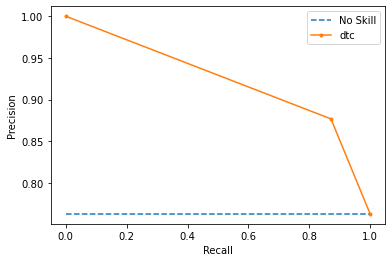

In [51]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(dtc_recall, dtc_precision, marker='.', label='dtc')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train1, y_train1)
y_pred5 = rfc.predict(X_test1)

In [22]:
print(confusion_matrix(y_test1, y_pred5))
print(classification_report(y_test1, y_pred5))

[[1017  528]
 [ 347 4621]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1545
           1       0.90      0.93      0.91      4968

    accuracy                           0.87      6513
   macro avg       0.82      0.79      0.81      6513
weighted avg       0.86      0.87      0.86      6513



In [52]:
rfc_prob = rfc.predict_proba(X_test1)

In [53]:
rfc_prob = rfc_prob[:,1]

In [54]:
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test1, rfc_prob)

In [55]:
rfc_f1, rfc_auc = f1_score(y_test1, y_pred5), auc(rfc_recall, rfc_precision)

In [56]:
print('dtc: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))

dtc: f1=0.914 auc=0.968


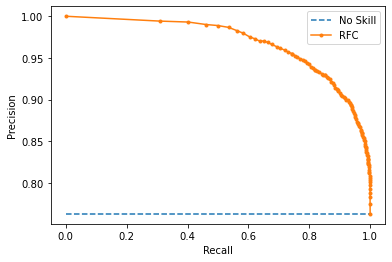

In [57]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rfc_recall, rfc_precision, marker='.', label='RFC')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# SMOTE to deal with Imbalanced data

# Log

In [11]:
X_res, y_res = over_sample.fit_resample(X_train1, y_train1)

In [12]:
log_res = LR.fit(X_res, y_res)

In [13]:
y_pred_res1 = log_res.predict(X_test1)

In [14]:
print(confusion_matrix(y_test1, y_pred_res1))
print(classification_report(y_test1, y_pred_res1))

[[1189  356]
 [1150 3818]]
              precision    recall  f1-score   support

           0       0.51      0.77      0.61      1545
           1       0.91      0.77      0.84      4968

    accuracy                           0.77      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.82      0.77      0.78      6513



In [30]:
log_prob_res = LR.predict_proba(X_test1)

In [31]:
log_prob_res = log_prob_res[:,1]

In [32]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test1, log_prob_res)
lr_f1, lr_auc = f1_score(y_test1, y_pred_res1), auc(lr_recall, lr_precision)

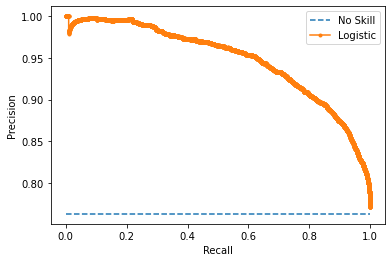

In [33]:
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(X_res, y_res)
y_pred6 = knn.predict(X_test1)

In [60]:
print(confusion_matrix(y_test1, y_pred6))
print(classification_report(y_test1, y_pred6))

[[1219  326]
 [1087 3881]]
              precision    recall  f1-score   support

           0       0.53      0.79      0.63      1545
           1       0.92      0.78      0.85      4968

    accuracy                           0.78      6513
   macro avg       0.73      0.79      0.74      6513
weighted avg       0.83      0.78      0.80      6513

